In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import scipy.stats as ss
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn import discriminant_analysis


### Некоторые методы предобработки данных

- Визуализация
- Удаление и корректировка выбросов
- Обработка пропущенных значений
- Обработка категориальных признаков
- Нормализация данных
- Отбор признаков (feature selection)
   - Выявление коррелированных признаков
- Конструирование признаков (feature engineering)

## 1. Загружаем данные

# Предсказание претензии

Предположим, что вы директор страховой компании и столкнулись с проблемой повышения числа претензий.Вы хотите повысить качество своих услуг и желаете предсказывать статус претензии.
Загрузим данные о претензиях в сингапурской сраховой компании: 

In [2]:
url = "https://raw.githubusercontent.com/GoshanX/MachineLearningUNN/master/travel_insurance.csv"
data_raw = pd.read_csv(url)

Таблица содержит данные о более 63 тысяч заявок, созданных в этой компании. Для каждой заявки указаны ее страховое агентство и его тип, канал подачи заявки, наименование продуктов страхования путешествий,продолжительность поездки, пункт назначения путешествия, сумма продаж полисов страхования путешествий, комиссия, полученная за агентство по страхованию путешествий, пол застрахованного лица, возраст застрахованного лица.

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одной заявке) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [3]:
data_raw.shape

(63326, 11)


Метод `data_raw.head()` отображает первые строки (по умолчанию, 5 строк) таблицы

In [4]:
data_raw.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


А вот последние строки:

In [5]:
data_raw.tail()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63
63325,JZI,Airlines,Online,Basic Plan,No,22,HONG KONG,26.0,9.10,F,35


Мы видим, что столбцы (признаки) имеют имена

- `Agency` - агенство
- `Agency Type` - тип агенства
- `Distribution Channel` - канал подачи заявки
- `Product Name` - наименованеи продукта страхования
- `Claim` - статус претензии (`'Yes'` - есть, `'No'` - нет)
- `Duration` - проолжительность поездки в днях
- `Destination` - местоположение
- `Net Sales` - сумма продаж полисов
- `Commision (in value)` - комиссия
- `Gender` - пол
- `Age` - возраст


Требуется предсказать бинарный признак `Claim` по остальным признакам.

Имена столбцов (признаков) можно получить таким образом:

In [6]:
data_raw.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

Имена строк (совпадают с номерами)

### Доступ к отдельным элементам и выделение подтаблиц (slice)

  Cпособ доступа    |      Элемент  | Подтаблица
 ------------------ | ------------- | -----------
  Доступ по имени   | `at`, `loc`   | `loc`
  Доступ по номеру  | `iat`, `iloc` | `iloc`


In [7]:
data_raw.at[2, 'Destination']

'AUSTRALIA'

In [8]:
data_raw.loc[2, 'Destination']

'AUSTRALIA'

In [9]:
data_raw.iat[2, 6]

'AUSTRALIA'

In [10]:
data_raw.iloc[2, 6]

'AUSTRALIA'

### Подтаблицы

`loc` и `iloc` (но не `at` и `iat`) позволяют выделять не только отдельные элементы, но и подтаблицы (slice)

In [11]:
data_raw.loc[[2,3,5], ['Agency', 'Claim', 'Destination']]

,Agency,Claim,Destination
2,CWT,No,AUSTRALIA
3,CWT,No,AUSTRALIA
5,JZI,No,UNITED STATES


In [12]:
data_raw.iloc[[2,3,5], [4,6,7]]

,Claim,Destination,Net Sales
2,No,AUSTRALIA,-49.5
3,No,AUSTRALIA,-39.6
5,No,UNITED STATES,-121.0


### Целые строки или столбцы:

In [13]:
data_raw.loc[:, ['Agency', 'Destination']] 

,Agency,Destination
0,CBH,MALAYSIA
1,CBH,MALAYSIA
2,CWT,AUSTRALIA
3,CWT,AUSTRALIA
4,CWT,ITALY
...,...,...
63321,JZI,JAPAN
63322,JZI,CHINA
63323,JZI,MALAYSIA
63324,JZI,VIET NAM


In [14]:
data_raw.loc[[2, 5], :] # или data_raw.loc[[2, 5], ] или data_raw.loc[[2, 5]]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44


### Доступ по булевой маске

In [15]:
df = data_raw.iloc[:4, 4:8]
df

,Claim,Duration,Destination,Net Sales
0,No,186,MALAYSIA,-29.0
1,No,186,MALAYSIA,-29.0
2,No,65,AUSTRALIA,-49.5
3,No,60,AUSTRALIA,-39.6


In [16]:
df.loc[[True, True, False, True], [False, True, True, False]] # или iloc

,Duration,Destination
0,186,MALAYSIA
1,186,MALAYSIA
3,60,AUSTRALIA


In [17]:
df.loc[[True, True, False, True]] # или iloc

,Claim,Duration,Destination,Net Sales
0,No,186,MALAYSIA,-29.0
1,No,186,MALAYSIA,-29.0
3,No,60,AUSTRALIA,-39.6


In [18]:
df[[True, True, False, True]]

,Claim,Duration,Destination,Net Sales
0,No,186,MALAYSIA,-29.0
1,No,186,MALAYSIA,-29.0
3,No,60,AUSTRALIA,-39.6


## Визуализация данных

Проведем работу с количественными признаками, а именно:
  1. Для каждого количественного признака построим гистограмму;
  2. Для пар таких признаков построим диаграммы рассеяния;

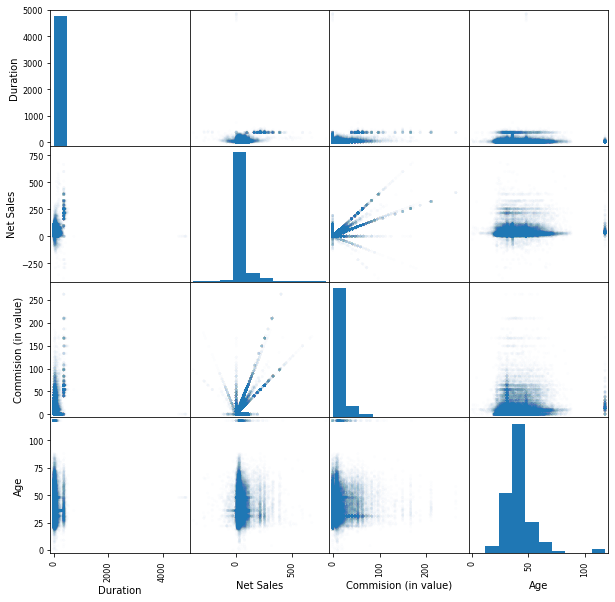

In [19]:
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

Построим матрицу корреляции для количественных признаков

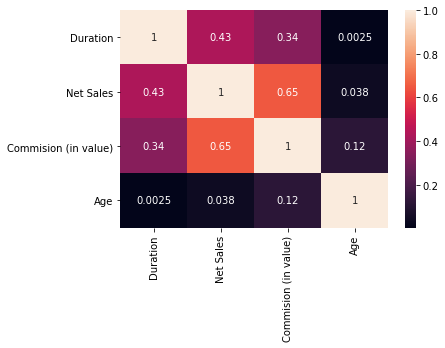

In [20]:
sns.heatmap(data_raw.corr(),annot=True)
pass

In [21]:
data_raw.describe()


,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


## 2. Боремся с выбросами (outliers)

Понятно, что продолжительность поездки не может быть отрицательной.
Поэтому проверим на неотрицательность `Duration`.


In [22]:
df=data_raw['Duration']<0
df.sum()


5

Можно вот так:

In [23]:
data_raw['Duration'].describe()


count    63326.000000
mean        49.317074
std        101.791566
min         -2.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

Мы видим, что существует 5 отрицательных значений продолжительности поездки. Возможно, это ошибки в данных. Заменим отрицательное значение средним:

In [24]:
data_raw.loc[data_raw['Duration'] < 0, 'Duration'] = 49.317
data = data_raw

Проверим еще раз на неотрицательность продолжительность поездки:

In [25]:
data['Duration'].describe()

count    63326.000000
mean        49.321062
std        101.790576
min          0.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

$100\%$ всех значений `'Duration'` теперь больше нуля. 

Возраст клиентов, которые путешествуют вряд ли превышает 100 лет

In [26]:
df=data['Age']>100
df.sum()

984

Мы видим, что существует 984 значения больше 100 лет. Нельзя отрицать, что люди могут путешествовать в этом возрасте, но для чистоты эксперимента заменим эти данные средним:

In [27]:
data.loc[data['Age'] > 100, 'Age'] = 39.96


Проверим еще раз максимальный возраст клиента:

In [28]:
data['Age'].describe()

count    63326.000000
mean        38.757345
std         10.019715
min          0.000000
25%         35.000000
50%         36.000000
75%         42.000000
max         88.000000
Name: Age, dtype: float64

$100\%$ всех значений `'Age'` теперь меньше 100. 

## 3. Работа с пропущенными значениями

In [29]:
data.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [30]:
data['Gender'].shape

(63326,)

Из 63326 значений 45107 пропущено, из чего можно сделать вывод либо об удалении столбца, либо об заполнении столбца значением "Not specified". Удалим столбец, так как информация о том, что пол не указан не даст нам дополнительной пользы.

In [31]:
data = data.drop('Gender', axis=1)

In [32]:
data.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

## 3. Работа с категориальными признаками

Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках.
Получим информацию о категориальных:

In [33]:
data.describe(include='object')

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination
count,63326,63326,63326,63326,63326,63326
unique,16,2,2,26,2,149
top,EPX,Travel Agency,Online,Cancellation Plan,No,SINGAPORE
freq,35119,45869,62219,18630,62399,13255


Построим матрицу корреляции для категориальных признаков используя V Крамера
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [34]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

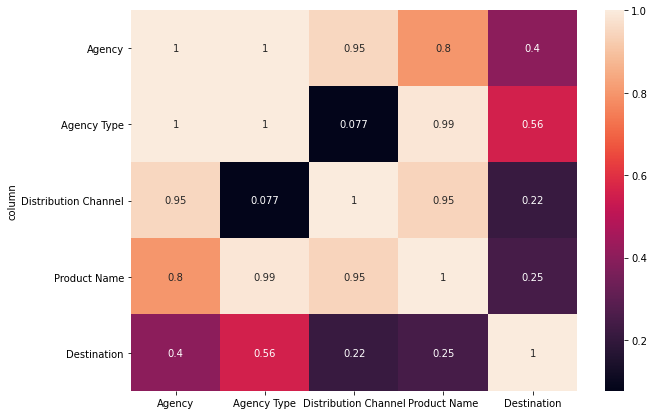

In [35]:
categorical=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',  'Destination']
cramers=pd.DataFrame({i:[cramers_v(data[i],data[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

Можно заметить, что признак "Agency Type" и "Distribution Channel" сильно коррелирован с признаком "Agency" и "Product Name", а значит их можно отбросить

In [36]:
data=data.drop('Agency',axis=1)
data=data.drop('Product Name',axis=1)
#data=data.drop('Agency Type',axis=1)

Разделим категориальные и числовые признаки

In [37]:
 categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
 numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
 print(categorical_columns)
 print(numerical_columns)

['Agency Type', 'Distribution Channel', 'Claim', 'Destination']
['Duration', 'Net Sales', 'Commision (in value)', 'Age']


Проведем векторизацию категориальных признаков


In [38]:
data_describe = data.describe(include = ['object'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Agency Type', 'Distribution Channel', 'Claim'] ['Destination']


In [39]:

 data['Distribution Channel'].unique()

array(['Offline', 'Online'], dtype=object)

In [40]:
 data.at[data['Distribution Channel'] == 'Offline', 'Distribution Channel'] = 0
 data.at[data['Distribution Channel'] == 'Online', 'Distribution Channel'] = 1
 data['Distribution Channel'].describe()

count     63326
unique        2
top           1
freq      62219
Name: Distribution Channel, dtype: int64

In [41]:
data['Claim'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
 data.at[data['Claim'] == 'No', 'Claim'] = 0
 data.at[data['Claim'] == 'Yes', 'Claim'] = 1
 data['Claim'].describe()

count     63326
unique        2
top           0
freq      62399
Name: Claim, dtype: int64

In [43]:
data['Agency Type'].unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [44]:
 data.at[data['Agency Type'] == 'Airlines', 'Agency Type'] = 0
 data.at[data['Agency Type'] == 'Travel Agency', 'Agency Type'] = 1
 data['Agency Type'].describe()

count     63326
unique        2
top           1
freq      45869
Name: Agency Type, dtype: int64

In [45]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])

## Нормализация количественных признаков


In [46]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.321062,40.702018,9.809992,38.757345
std,101.790576,48.845637,19.804388,10.019715
min,0.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,42.000000
max,4881.000000,810.000000,283.500000,88.000000


In [47]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Duration,Net Sales,Commision (in value),Age
count,6.332600e+04,6.332600e+04,6.332600e+04,6.332600e+04
mean,-1.782789e-15,-3.198147e-14,-1.301532e-15,3.682426e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.845347e-01,-8.797142e+00,-4.953443e-01,-3.868109e+00
25%,-3.961178e-01,-4.647706e-01,-4.953443e-01,-3.749952e-01
50%,-2.684046e-01,-2.901389e-01,-4.953443e-01,-2.751920e-01
75%,3.614222e-02,1.494091e-01,8.785973e-02,3.236275e-01
max,4.746686e+01,1.574957e+01,1.381966e+01,4.914577e+00


Соединим все данные в одну таблицу

In [48]:

data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)

print(data.shape)

(63326, 156)


## Разделение данных


Разобьем данные на X и Y


In [49]:
X = data.drop(('Claim'), axis = 1)
y = data['Claim']
y=y.astype('int')
X['Distribution Channel'] = X['Distribution Channel'].astype('int')
X['Agency Type'] = X['Agency Type'].astype('int')

In [50]:
print(X.shape)
print(y.shape)


(63326, 155)
(63326,)


In [90]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


Избавимся от несбалансированности в тестовой выборке

In [91]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)
X_test, y_test = smote.fit_sample(X_test, y_test)

## KNN

In [100]:
from sklearn import neighbors
err_train = []
err_test = []

k_range = range(1, 10)
for k in k_range:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    y_pred      = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)
    err_train.append(np.mean(y_train != y_pred))
    err_test.append(np.mean(y_test != y_test_pred))

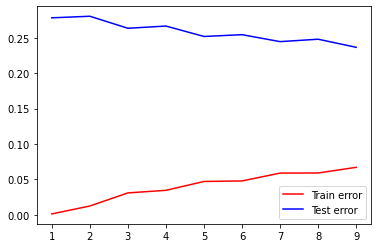

In [101]:
plt.plot(k_range, err_train, 'r',label="Train error")
plt.plot(k_range, err_test, 'b',label="Test error")
plt.legend()
plt.show()

При увеличении числа соcедей растет точность, но из-за несбалансированности классов нет смысла смотреть только точность, выведем дополнительные метрики, а именно precision - его можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, и recall - показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

### 10 соседей

In [102]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,  y_train)
y_test_predict = knn.predict(X_test)

In [103]:
print(confusion_matrix(y_test, y_test_predict))

[[10938  1537]
 [ 4435  8040]]


In [104]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79     12475
           1       0.84      0.64      0.73     12475

    accuracy                           0.76     24950
   macro avg       0.78      0.76      0.76     24950
weighted avg       0.78      0.76      0.76     24950



### 20 соседей

Сравним значения recall и precision при количестве соседей 20.


In [105]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train,  y_train)
y_test_predict = knn.predict(X_test)


In [106]:
print(confusion_matrix(y_test, y_test_predict))

[[10357  2118]
 [ 3572  8903]]


In [107]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78     12475
           1       0.81      0.71      0.76     12475

    accuracy                           0.77     24950
   macro avg       0.78      0.77      0.77     24950
weighted avg       0.78      0.77      0.77     24950



Произошел рост accuracy, но снизилась метрика precision для второго и recall для первого класса. В целом увеличение количества соседей не дает прироста точности.

## Классификатор опорных векторов

In [115]:
from sklearn import  

clf = svm.SVC()
clf.fit(X_train, y_train)

y_test_predict = clf.predict(X_test)

In [116]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78     12475
           1       0.81      0.70      0.75     12475

    accuracy                           0.77     24950
   macro avg       0.77      0.77      0.77     24950
weighted avg       0.77      0.77      0.77     24950



Классификатор опорных векторов значительно дольше отрабатывает, но результаты схожи с KNN.

## Рандомный лес


In [95]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)

In [96]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83     12475
           1       0.96      0.62      0.75     12475

    accuracy                           0.80     24950
   macro avg       0.84      0.80      0.79     24950
weighted avg       0.84      0.80      0.79     24950



Рандомный лес показал результаты лучше чем KNN и SVC.

## Логистическая регрессия


In [97]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_test_predict = lr.predict(X_test)


C:\Users\1292355\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     12475
           1       0.83      0.92      0.87     12475

    accuracy                           0.86     24950
   macro avg       0.87      0.86      0.86     24950
weighted avg       0.87      0.86      0.86     24950



In [99]:
print(confusion_matrix(y_test, y_test_predict))

[[10134  2341]
 [ 1057 11418]]


Логистическая регрессия показала лучший результат чем KNN, RandomForest и SVC по всем метрикам.

## XGBoost

In [92]:

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_xgb = xgb.predict(X_test)



C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [93]:
print(classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     12475
           1       0.92      0.91      0.92     12475

    accuracy                           0.92     24950
   macro avg       0.92      0.92      0.92     24950
weighted avg       0.92      0.92      0.92     24950



In [94]:
print(confusion_matrix(y_test, y_xgb))

[[11487   988]
 [ 1103 11372]]


XGBoost значительно быстрее отрабатывает, чем SCV и результаты лучше чем у других классификаторов.

## PCA


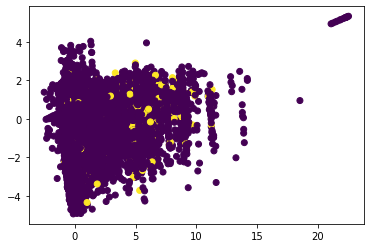

In [108]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca2 = pca.transform(X)

fig, ax = plt.subplots()

ax.scatter(X_pca2[:,0], X_pca2[:,1],
           c = y.values)
plt.show()

Из графика наглядно не видно раздение классов, так как элементы одного класса, перекрывают элементы другого.

Протестируем алгоритм сокращения размерности для классификатора опорных векторов.

C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:48:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:48:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:49:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:49:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:50:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


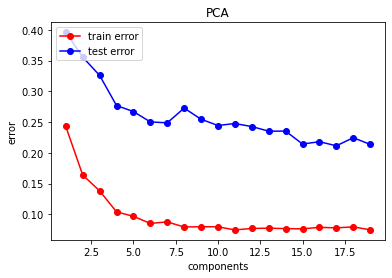

In [109]:
comp = range(1, 20, 1)
err_train_mas = []
err_test_mas = []
for temp in comp:
    pca = PCA(n_components = temp)
    X_PCA = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.2, random_state = 1)
    
    X_train, y_train = SMOTE().fit_sample(X_train, y_train.values.ravel())
    X_test, y_test = SMOTE().fit_sample(X_test, y_test.values.ravel())
    
    xgb = XGBClassifier()
    xgb.fit(X_train,y_train)
    err_train_mas.append(np.mean(xgb.predict(X_train) != y_train))
    err_test_mas.append(np.mean(xgb.predict(X_test) != y_test))
plt.plot(comp, err_train_mas, 'r-o', label = 'train error')
plt.plot(comp, err_test_mas,  'b-o', label = 'test error') 
plt.title('PCA')
plt.xlabel('components')
plt.ylabel('error')
plt.legend(loc = 2)

In [110]:
print('Train accuracy -', 1 - min(err_train_mas))
print('Test accuracy -', 1 - min(err_test_mas))

Train accuracy - 0.9253164810511978
Test accuracy - 0.7885370741482967


Судя по графику, можно сделать вывод о возможном сокращении признаков до размерности n = 5, что позволит сократить время на обработку данных. Но обратной стороной является то, что точность вычислений на тестовой выборке упала с 92% до 79%.

# LDA

Так как существует ограничение на количество компонент, то максимальное число компонент для LDA равно 1.

In [111]:
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=1)
lda.fit(X, y)
X_lda = lda.transform(X)



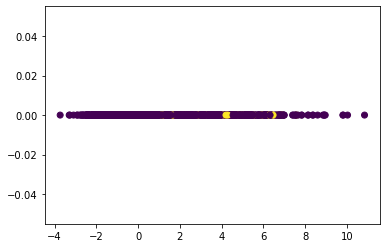

In [112]:
fig, ax = plt.subplots()

ax.scatter(X_lda[:,0], [0]*len(X_lda),
           c = y.values)
plt.show()

Изобразив элементы классов на линейном множестве, можно заметить, что данные визуально не различимы, также как и на PCA при числе компонент равным 2.

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size = 0.2, random_state = 1)

X_train, y_train = SMOTE().fit_sample(X_train, y_train.values.ravel())
X_test, y_test = SMOTE().fit_sample(X_test, y_test.values.ravel())

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_test_predict = xgb.predict(X_test)
y_train_predict = xgb.predict(X_train)


print(classification_report(y_test, y_test_predict))

C:\Users\1292355\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:52:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.69      0.82      0.75     12475
           1       0.78      0.63      0.69     12475

    accuracy                           0.72     24950
   macro avg       0.73      0.72      0.72     24950
weighted avg       0.73      0.72      0.72     24950



In [114]:
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print('Train accuracy -', 1 - err_train)
print('Test accuracy -', 1 - err_test)

Train accuracy - 0.7895501161765884
Test accuracy - 0.7222044088176353


Судя по результатам, можно сделать вывод о возможном сокращении признаков до размерности n = 1, что позволит сократить время на обработку данных. Но обратной стороной является то, что точность вычислений на тестовой выборке упала с 92% до 72%.